# *Bean* There, Done That, *Brew*(Bro): Predicting the Quality of Coffee Taste from Cupping Score Features Using the k-Nearest Neighbor (kNN) Regression Algorithm

**BY:** <br> 
`Baguio`, Christian Jay <br>
`Bandivas`, Roxanne Mae <br>
`Barrio`, Reyjane Mae <br>
`Palmes`, Jhibsam <br>
`Sabacajan`, Cle Michael <br>
`Tapao`, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

## **☕Introduction**

Coffee connoisseurs consider identifying the various subtleties of flavor, fragrance, and overall quality to be an art form. With the increasing demand for specialized coffee experiences, both consumers and producers are continuously looking for ways to assure consistency and perfection in every cup. However, in the quest of coffee perfection, difficulties occur in properly analyzing and forecasting the quality of coffee flavor, which frequently relies on subjective assessments or complicated sensory analysis. While cupping scores, a standardized method for evaluating coffee quality, provide some objectivity, the practice is labor-intensive and requires the knowledge of skilled cuppers. As a result, access to consistent and reliable assessments of coffee taste quality remains limited, hindering both producers and consumers in their quest for the perfect cup.

By utilizing the power of data science and machine learning, our initiative intends to improve the way coffee quality is evaluated and predicted. We specifically focus on using the k-Nearest Neighbor (kNN) classification method to examine cupping score characteristics, resulting in an extensive model for predicting coffee flavor and quality. This new technique enables coffee fans and prospective coffee entrepreneurs to make better informed decisions, ensuring that every sip provides a wonderful sensory experience.

## **☕Data Discussion**

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.

<br>

**Features and Attributes:**

**Certification Information** <br>
`Country of Origin:` The country where the coffee beans were grown. <br>
`Farm Name:` The name of the farm where the coffee beans were produced. <br>
`Lot Number:` The unique identifier for a specific lot of coffee beans. <br>
`Mill:` The mill or processing facility where the coffee beans were processed. <br>
`ICO Number:` The International Coffee Organization (ICO) number associated with the coffee. <br>
`Company:` The company or organization responsible for the coffee. <br>
`Altitude:` The altitude at which the coffee beans were grown. <br>
`Region:` The region or geographical area where the coffee beans were produced. <br>
`Producer:` The individual or entity that produced the coffee beans. <br>
`Number of Bags:` The total number of bags of coffee beans. <br>
`Bag Weight:` The weight of each bag of coffee beans. <br>
`In-Country Partner:` The local partner or representative involved in the coffee certification process. <br>
`Harvest Year:` The year when the coffee beans were harvested. <br>
`Grading Date:` The date when the coffee beans were graded. <br>
`Owner:` The owner or owner's representative of the coffee beans. <br>
`Variety:` The variety or type of coffee beans. <br>
`Status:` The status or condition of the coffee beans. <br>
`Processing Method:` The method used to process the coffee beans. <br>

**Cupping Scores** <br>
`Aroma:` The score or rating for the aroma of the coffee. <br>
`Flavor:` The score or rating for the flavor of the coffee. <br>
`Aftertaste:` The score or rating for the aftertaste of the coffee. <br>
`Acidity:` The score or rating for the acidity of the coffee. <br>
`Body:` The score or rating for the body or mouthfeel of the coffee. <br>
`Balance:` The score or rating for the balance of the coffee's flavors. <br>
`Uniformity:` The score or rating for the uniformity of the coffee. <br>
`Clean Cup:` The score or rating for the cleanliness of the coffee. <br>
`Sweetness:` The score or rating for the sweetness of the coffee. <br>
`Total Cup Points:` The total score or rating for the coffee based on cupping evaluation. <br>
`Overall:` The overall score or rating for the coffee. <br>

**Green Analysis** <br>
`Moisture:` The moisture content of the green coffee beans. <br>
`Color:` The color of the green coffee beans. <br>
`Defects:` The number of defects found in the coffee beans, numbers of full defects are calculated on a basis of 350 grams of green coffee sample. <br>
`Category One Defects:` The number of defects categorized as "Category One." Identified as full black or sour bean, pod/cherry, and large or medium sticks or stones. <br>
`Category Two Defects:` The number of defects categorized as "Category Two." Identified as parchment, hull/husk, broken/chipped, insect damage, partial black or sour, shell, small sticks or stones, water damage. <br>
`Quakers:` The presence or number of quaker beans, which are underdeveloped or defective beans. <br>

**Sample Information** <br>
`Expiration:` The expiration date of the coffee certification. <br>
`Certification Body:` The organization responsible for certifying the coffee. <br>
`Certification Address:` The address of the certification body. <br>
`Certification Contact:` The contact information for the certification body. <br>

<br>

**Citation** 

ehmtang. (2023). Coffee Quality Institute Arabica Reviews May2023. (<a href="https://www.kaggle.com/datasets/erwinhmtang/coffee-quality-institute-reviews-may2023/data">Kaggle.com</a>) <br>
Coffee Quality Institute, & Eximware Inc. (2014). Home - Q Coffee System. (<a href="https://database.coffeeinstitute.org/">Coffeeinstitute.org</a>) <br>

## 🔃 Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(font='Times New Roman')

#sklearn Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from collections import Counter
import pylab as plot
import mglearn
from numpy import array
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## 📩 Load Dataset

In [2]:
cf_df = pd.read_csv('coffee.csv')
cf_df.head()

,coffee_id,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,...,Color,Category_One_Defects,Category_Two_Defects,Quakers,Expiration,Certification_Body,Certification_Address,Certification_Contact,parsed_expiration,parsed_grading_date
0,#647123,Guatemala,san francisco cotzal,11/441/50,"inmobiliaria e inversiones dos mil, s.a.",11/441/50,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,...,Green,0,1,3.0,June 22 2023,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2023-06-22,2022-06-22
1,#927000,Guatemala,San jose del lago,11/15/95,San jose del lago,11/15/95,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,2,1.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
2,#902618,Guatemala,varias fincas,11/15/51,El Trèbol/Lìnea Gourmet,11/15/51,"Peter Schoenfeld, S.A.",1550.0,Oriente Santa rosa,varios productores,...,Green,0,2,1.0,March 21 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-03-21,2023-03-22
3,#781706,Guatemala,San jose del lago,11/15/96,San jose del lago,11/15/96,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,1,0.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
4,#237025,Guatemala,Finca Alta Luz,11-63-657,NaN,11-63-657,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,...,Green,0,5,1.0,April 25 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-25,2023-04-26


In [4]:
cf_df['Overall']

0       7.92
1       7.75
2       7.67
3       7.75
4       7.75
        ... 
1504    8.00
1505    7.75
1506    7.83
1507    8.00
1508    7.58
Name: Overall, Length: 1509, dtype: float64

## 🔎 Data Understanding

In [3]:
#Get information about the dataset.
cf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   coffee_id              1509 non-null   object 
 1   Country_of_Origin      1508 non-null   object 
 2   Farm_Name              1151 non-null   object 
 3   Lot_Number             467 non-null    object 
 4   Mill                   1196 non-null   object 
 5   ICO_Number             1232 non-null   object 
 6   Company                1300 non-null   object 
 7   Altitude               1279 non-null   float64
 8   Region                 1450 non-null   object 
 9   Producer               1278 non-null   object 
 10  Number_of_Bags         1509 non-null   int64  
 11  Bag_Weight             1509 non-null   object 
 12  In_Country_Partner     1509 non-null   object 
 13  Harvest_Year           1462 non-null   object 
 14  Grading_Date           1509 non-null   object 
 15  Owne

In [4]:
#check for null values.
cf_df.isna().sum()

coffee_id                   0
Country_of_Origin           1
Farm_Name                 358
Lot_Number               1042
Mill                      313
ICO_Number                277
Company                   209
Altitude                  230
Region                     59
Producer                  231
Number_of_Bags              0
Bag_Weight                  0
In_Country_Partner          0
Harvest_Year               47
Grading_Date                0
Owner                       7
Variety                   208
Status                   1311
Processing_Method         157
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean_Cup                   0
Sweetness                   0
Overall                     0
Defects                  1311
Total_Cup_Points            0
Moisture                    0
Color                     216
Category_O

## 🖩 Calculate the percentage of missing values

In [5]:
#check percentage for Status.
Status_nan_percentage = cf_df.Status.isna().sum()/len(cf_df)*100
"{} % of values in Status columns are missing".format(round(Status_nan_percentage, 2))

'86.88 % of values in Status columns are missing'

In [6]:
#check percentage for Defects.
Defects_nan_percentage = cf_df.Defects.isna().sum()/len(cf_df)*100
"{} % of values in Defects columns are missing".format(round(Defects_nan_percentage, 2))

'86.88 % of values in Defects columns are missing'

This indicates that majority values of status and defects are missing. Best approach for this one is to remove from the dataset.

In [6]:
cf_df.drop(['Status','Defects'], axis = 1, inplace = True)

## 🔎 Examine Dataset (EDA)

## 🖩 Data Imputation

In [7]:
#Fill each attributes with nan values with their mean values
df = cf_df.fillna(cf_df.mean())

## 💡 Relationship Features

<Axes: >

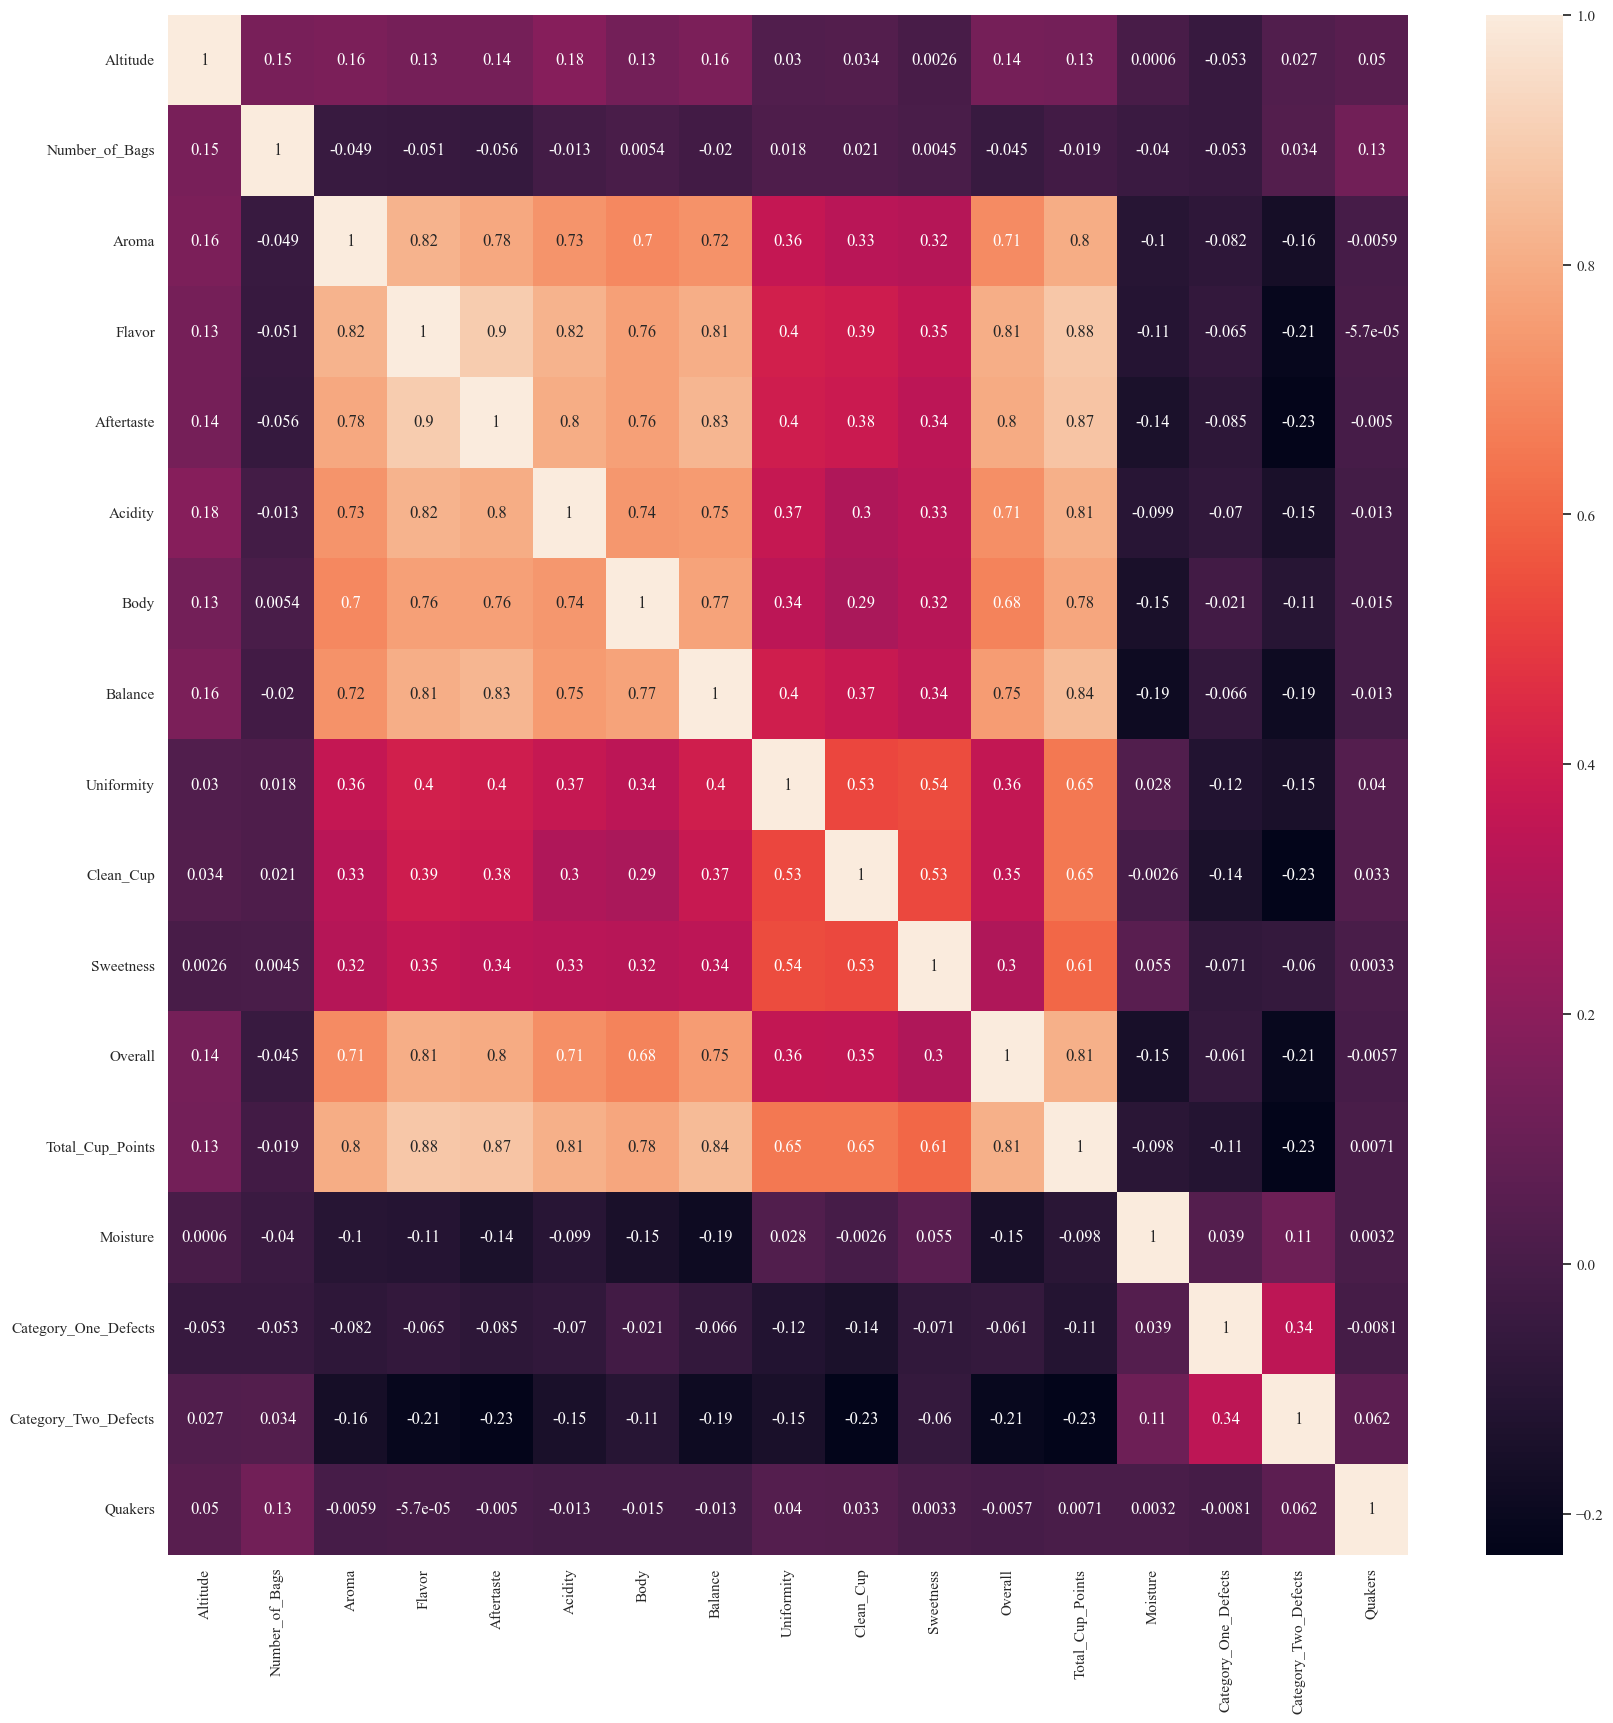

In [8]:
#check for data correlations
plt.figure(figsize=(20,20))
cq_corr = df.corr(method='pearson')
sns.heatmap(cq_corr, annot = True)

The confusion matrix abow shows the highest correlation between 'aroma with flavor', flavor with aftertase', 'acidity with flavor', 'body with total cup points', 'balance with total cup points', 'overall with flavor' and 'total cup points with flavor'. As for the 'flavor with aftertaste' it isn't necessary to explain it in depth, but in summary, the relationship between them shows that the amount of flavor of a coffee bean, will give them an aftertaste, without regard if what flavor the bean is.

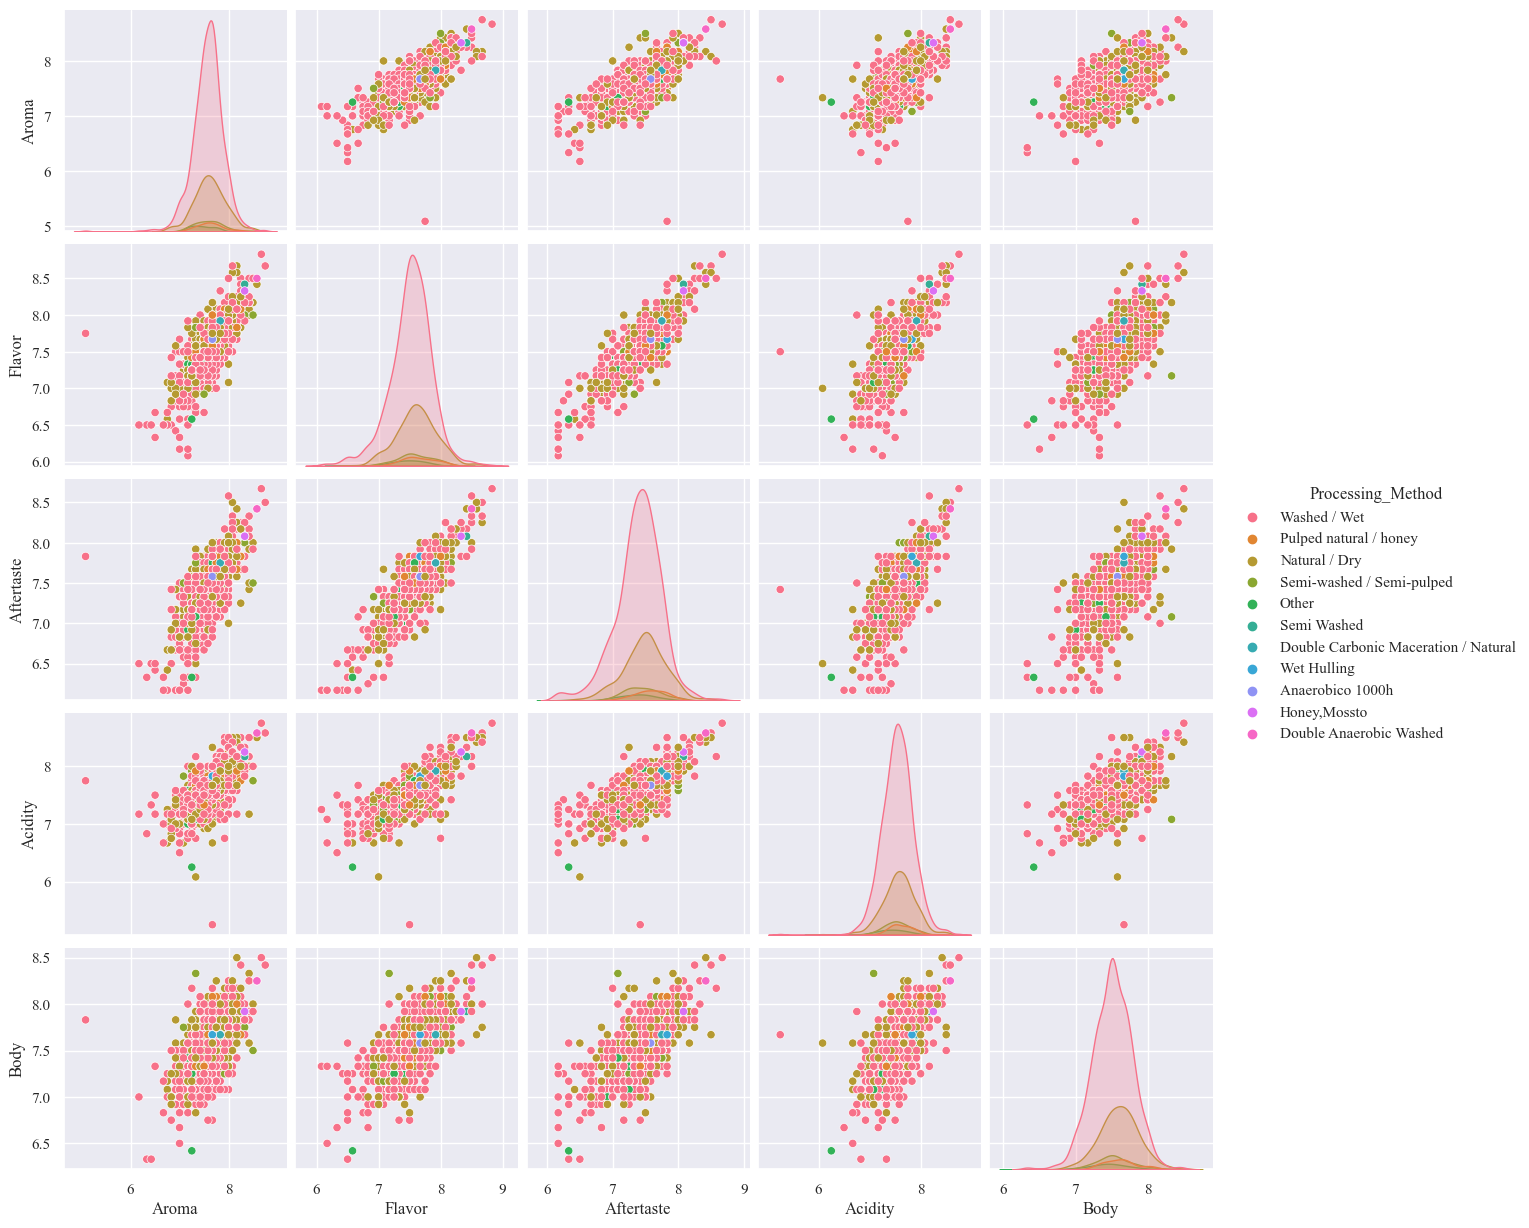

In [9]:
sns.pairplot(df, vars = ['Aroma','Flavor','Aftertaste','Acidity','Body'], hue = 'Processing_Method')

Text(0.5, 1.0, 'Flavor vs Aftertaste')

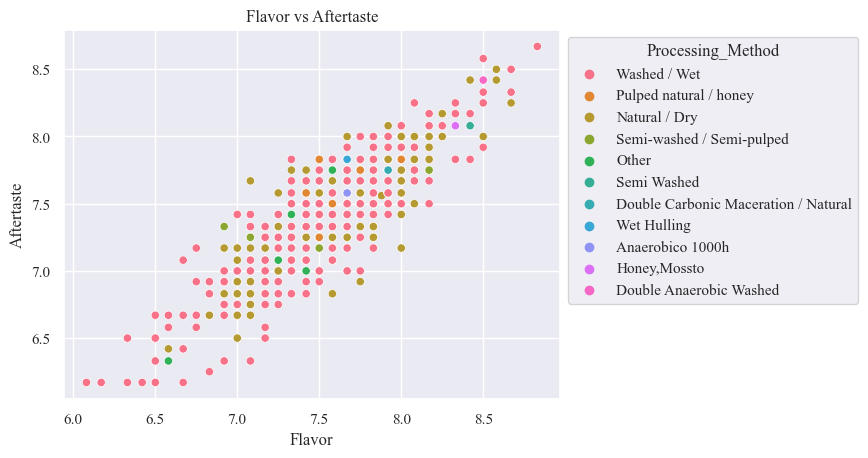

In [11]:
ax = sns.scatterplot(x = 'Flavor', y = 'Aftertaste', hue = 'Processing_Method', data = df)
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1, 1))
ax.set_title('Flavor vs Aftertaste')

## 💡Feature Understanding

In [10]:
certification_info = df[['Country_of_Origin', 'Farm_Name', 'Lot_Number', 'Mill', 'ICO_Number', 'Company', 'Altitude', 'Region',
                         'Producer', 'Number_of_Bags', 'Bag_Weight', 'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 
                         'Owner', 'Variety', 'Color', 'Moisture', 'Processing_Method']]

cupping_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 
                     'Sweetness', 'Total_Cup_Points', 'Overall']]

green_analysis = df[['Category_One_Defects', 'Category_Two_Defects', 'Quakers']]

sample_info = df[['Expiration', 'Certification_Body', 'Certification_Address', 'Certification_Contact']]

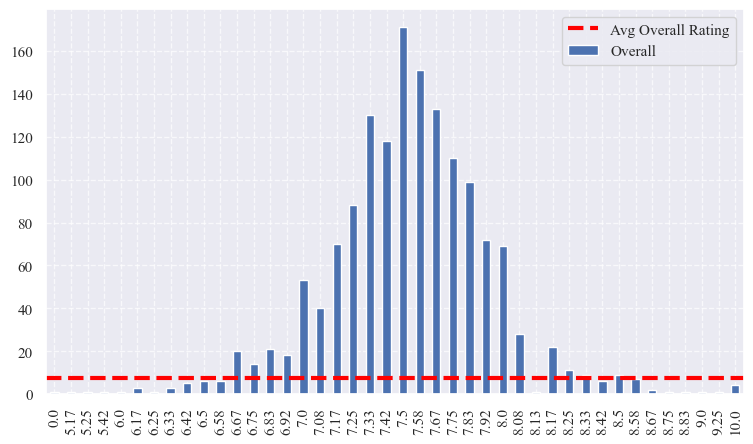

In [11]:
plt.figure(figsize = (9,5))
cupping_scores['Overall'].value_counts().sort_index().plot(kind = 'bar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=np.mean(cupping_scores['Overall']), color='red', linestyle='--', linewidth=3, label='Avg Overall Rating')
plt.legend()
plt.show()

Set an arbitrary cutoff for the dependent variable (Overall) at 7.51 or higher getting classified as great or 1, and the remainder as average or 0.

In [15]:
cupping_score = cupping_scores.copy()
cupping_score['Overall'] = cupping_score['Overall'].apply(lambda x: 1 if x > 7.5 else 0)
cupping_score.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Overall
0,7.83,7.92,7.75,8.00,7.75,7.75,10.0,10.0,10.0,84.92,1
1,7.58,7.83,7.58,7.75,7.67,7.75,10.0,10.0,10.0,83.92,1
2,7.67,7.83,7.67,7.83,7.75,7.67,10.0,10.0,10.0,84.08,1
3,7.58,7.92,7.67,7.75,7.83,7.75,10.0,10.0,10.0,84.25,1
4,7.67,7.83,7.75,7.75,7.83,7.75,10.0,10.0,10.0,84.33,1


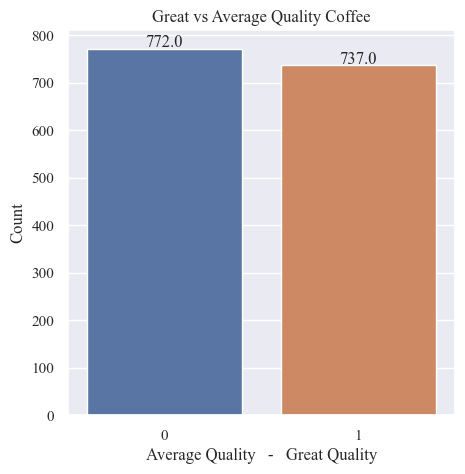

In [16]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Overall', data = cupping_score)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center')
plt.xlabel('Average Quality   -   Great Quality')
plt.ylabel('Count')
plt.title('Great vs Average Quality Coffee')
plt.show()

<Axes: title={'center': 'Top 10 Coffee Bean Country of origin counts'}>

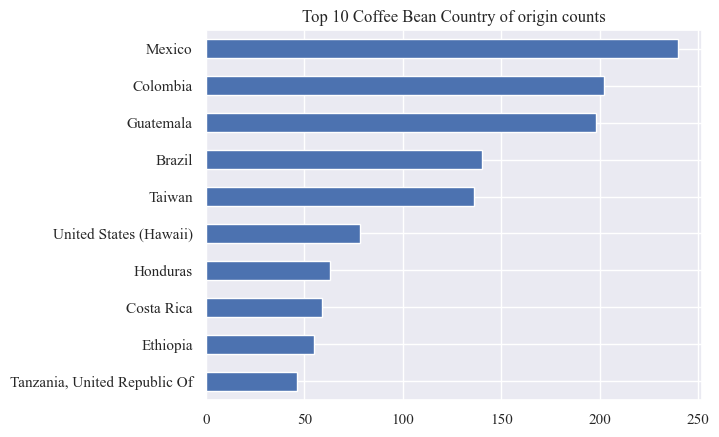

In [47]:
ax = certification_info['Country_of_Origin'].value_counts().head(10).sort_values().plot(kind = 'barh', title = 'Top 10 Coffee Bean Country of origin counts')
ax

## 🔎 Descriptive Statistics
Summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [17]:
cupping_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,1509.0,7.585991,0.371316,0.0,7.42,7.58,7.75,8.75
Flavor,1509.0,7.548615,0.393472,0.0,7.33,7.58,7.75,8.83
Aftertaste,1509.0,7.425964,0.396179,0.0,7.25,7.42,7.67,8.67
Acidity,1509.0,7.554758,0.371626,0.0,7.33,7.58,7.75,8.75
Body,1509.0,7.534791,0.347488,0.0,7.33,7.50,7.75,8.58
Balance,1509.0,7.535726,0.391863,0.0,7.33,7.58,7.75,8.75
Uniformity,1509.0,9.853930,0.525392,0.0,10.00,10.00,10.00,10.00
Clean_Cup,1509.0,9.855017,0.721136,0.0,10.00,10.00,10.00,10.00
Sweetness,1509.0,9.915964,0.495834,0.0,10.00,10.00,10.00,10.00
Total_Cup_Points,1509.0,82.333612,3.378540,0.0,81.42,82.67,83.83,90.58


Above, we have a table showing the descriptive analysis of the attributes and its instances of the dataset used. Let us examine the attributes one by one.

1. Aroma: <br>
    > The average percentage aroma rating is 7.5. The standard deviation is at 0.37. The minimum is 0 while the maximum rating is at 8.75. 25% of aroma rating rated 7.4, 50% of aroma rating rated 7.5, and 75% of the aroma rating rated 7.7.
<br>
2. Flavor: <br>
    > The average rating for the flavor of the coffee is 7.54. The standard deviation is 0.39. the minimum is 0 while the maximum flavor rate is 8.83. 25% of the flavor rated 7.3, 50% of the flavor rated 7.5, and 75% of the flavor rated 7.75.
<br>
3. Aftertaste: <br>
    > The average rating for the aftertaste of the coffee is 7.4. The standard deviation is at 0.40. The minimum 0 while the maximum aftertaste rating is 8.6. 25% rated 7.2, 50% rated 7.4, and 75% rated 7.6.
<br>
4. Acidity: <br>
    > The average rating for the acidity of the coffee is 7.5. The standard deviation is at 0.37. The minimum 0 while the maximum aftertaste rating is 8.7. 25% rated 7.3, 50% rated 7.5, and 75% rated 7.7.
5. Overall: <br>
    > The average overall score or rating for the coffee is 7.5. The standard deviation is at 0.45. The minimum 0 while the maximum overall rating is 10. 25% rated 7.3, 50% rated 7.5, and 75% rated 7.7.

## ❔Question ponder

* What Processing Method has a highest number of defects categorized as "Category Two."?
* What type of coffee beans has a highest rating for the acidity of the coffee?
* What type of coffee beans has a highest rating for the aroma of the coffee?
* What type of coffee beans has a highest rating for the Aftertaste of the coffee?

Text(0.5, 0, 'Category_Two_Defects')

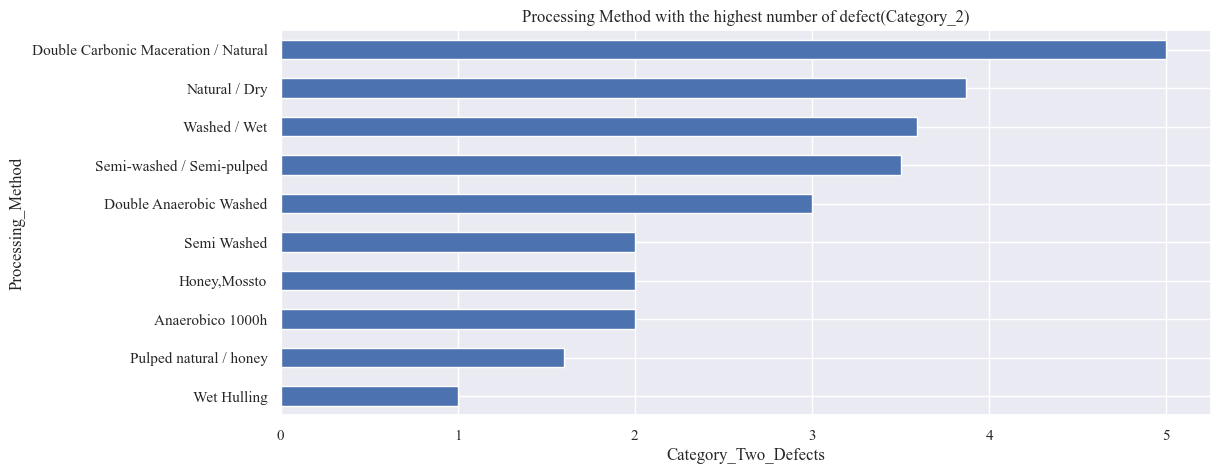

In [49]:
axis = df.query('Processing_Method != "Other"').groupby('Processing_Method')['Category_Two_Defects'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Processing Method with the highest number of defect(Category_2)')
axis.set_xlabel('Category_Two_Defects')

Text(0.5, 0, 'Acidity')

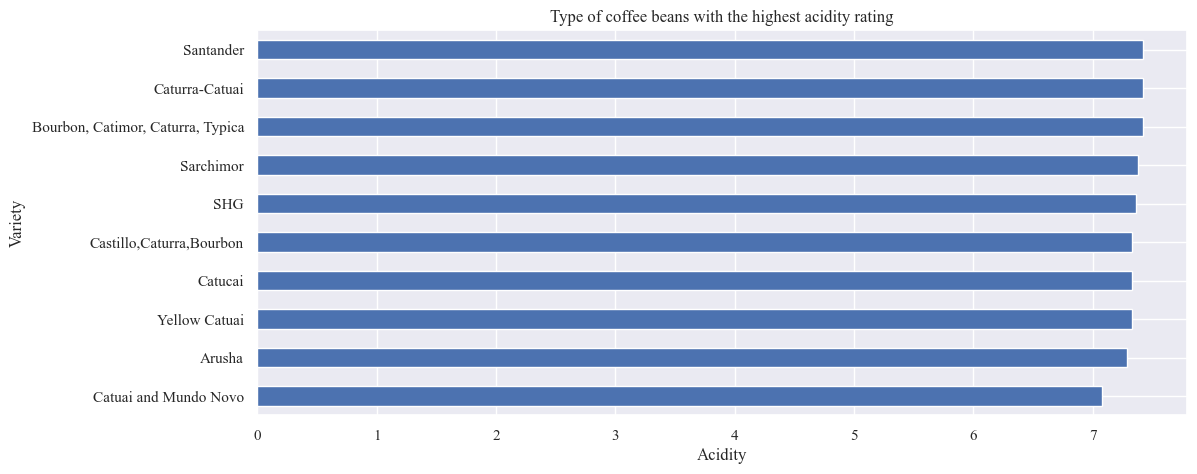

In [50]:
axis = df.query('Variety != "Other"').groupby('Variety')['Acidity'].agg(['mean']) \
       .sort_values('mean')['mean'].head(10).plot(kind = 'barh', figsize = (12, 5), title = 'Type of coffee beans with the highest acidity rating')
axis.set_xlabel('Acidity')

## 💡 Highlights of the Results

**3 highlights after implementing kNN Regression algorithm:**
1. The optimal no. of neighbors is 5 with an accuracy score of **80%**
2. The test accuracy exceeded the required 1.25PCC target accuracy of **62.53%**.
3. The features that affect the target most are `Flavor`, `Aftertaste`, and `Balance`.

## 🤖 kNN Regression Implementation

In [13]:
X = cupping_scores.drop('Overall', axis = 1)
y = cupping_scores['Overall']

Best Accuracy for kNN: 0.8048089446573582
Best parameter for n_neighbor: 5


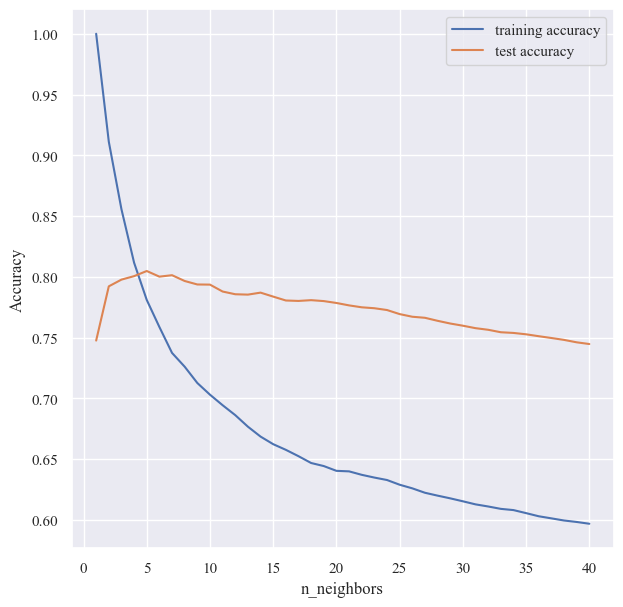

In [17]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 41)

for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize = (7,7))    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(f"Best Accuracy for kNN: {np.max(test_accuracy)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_accuracy)+1}")

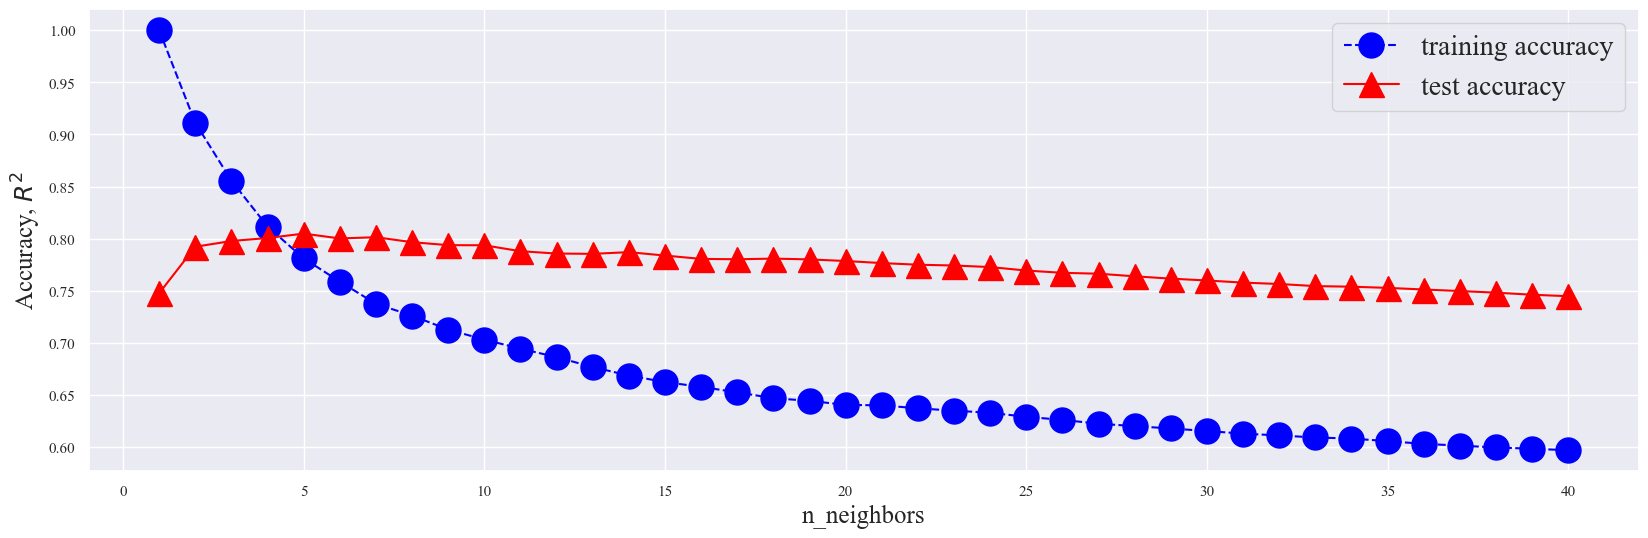

In [18]:
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 41)

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train) 
    training_accuracy.append(reg.score(X_train, y_train)) 
    test_accuracy.append(reg.score(X_test, y_test)) 

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)

plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

pass

In [22]:
tanan_training = pd.DataFrame()
tanan_test = pd.DataFrame()

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.75, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 41) # try n_neighbors from 1 to 100

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) #build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsRegressor(n_neighbors=n_neighbors)    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    tanan_training[seedN]=training_accuracy
    tanan_test[seedN] = test_accuracy
pass

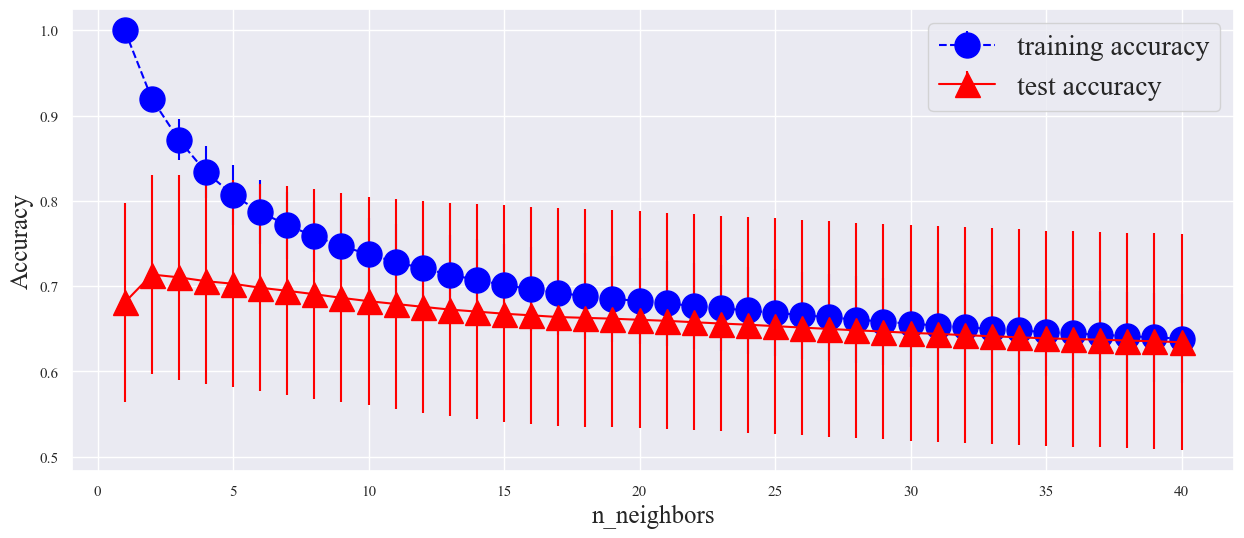

In [23]:
fig = plt.figure(figsize=(15, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, tanan_training.mean(axis=1),
             yerr=tanan_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, tanan_test.mean(axis=1),
             yerr=tanan_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

## Clean cup Target

Best Accuracy for kNN: 0.8736678711986521
Best parameter for n_neighbor: 4


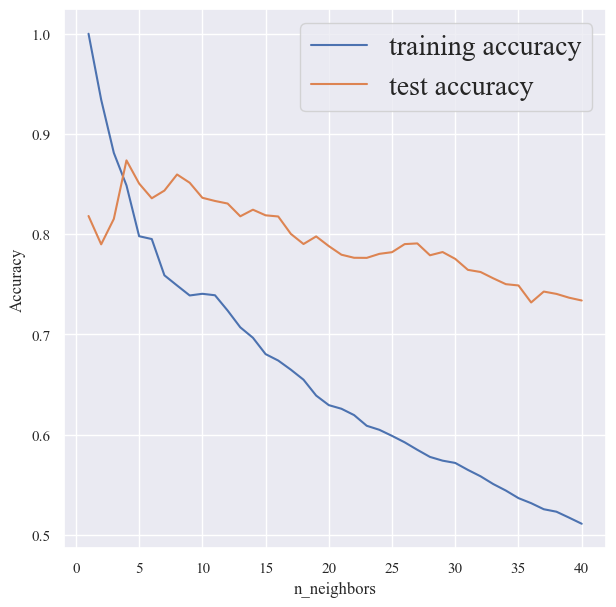

In [46]:
X = cupping_scores.drop('Clean_Cup', axis = 1)
y = cupping_scores['Clean_Cup']

cupX_train, cupX_test, cupy_train, cupy_test = tts(X, y, test_size=0.25, random_state=90)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 41)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(cupX_train, cupy_train)

    training_accuracy.append(reg.score(cupX_train, cupy_train))
    test_accuracy.append(reg.score(cupX_test, cupy_test))

plt.figure(figsize = (7,7))    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(f"Best Accuracy for kNN: {np.max(test_accuracy)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_accuracy)+1}")

## 📝 Evaluate Model Performance

In [25]:
# Make predictions on test data
y_pred = knn.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) 

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.041803212136243384
Root Mean Squared Error (RMSE): 0.20
R-squared (R2): 0.7523789597363277


In [47]:
#Clean Cup
# Make predictions on test data
cupy_pred = reg.predict(cupX_test)

# Calculate performance metrics
cup_mse = mean_squared_error(cupy_test, cupy_pred)
cup_r2 = r2_score(cupy_test, cupy_pred)
cup_rmse = np.sqrt(mse) 

# Print performance metrics
print(f'Mean Squared Error (MSE): {cup_mse}')
print(f'Root Mean Squared Error (RMSE): {cup_rmse:.2f}')
print(f'R-squared (R2): {cup_r2}')

Mean Squared Error (MSE): 0.06895905274470897
Root Mean Squared Error (RMSE): 0.26
R-squared (R2): 0.7338778113822724


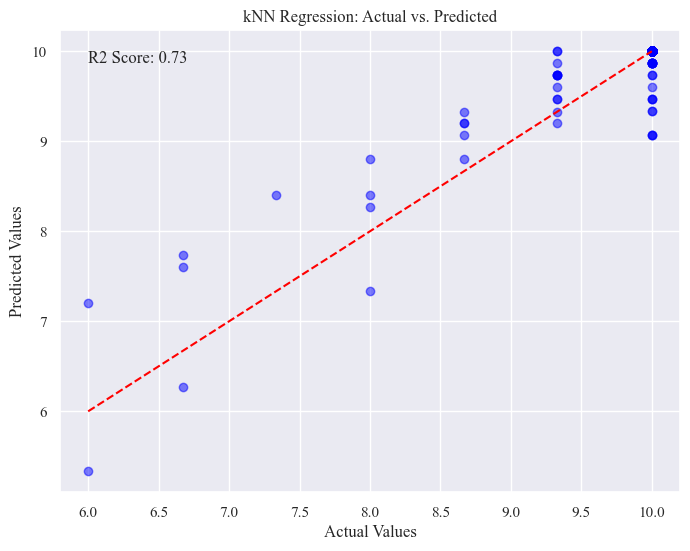

In [50]:
#Clean Cup
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(cupX_train, cupy_train) 

cup_y_pred = reg.predict(cupX_test)

r2 = r2_score(cupy_test, cup_y_pred)


plt.figure(figsize=(8, 6))
plt.scatter(cupy_test, cup_y_pred, color='blue', alpha=0.5)
plt.plot([min(cupy_test), max(cupy_test)], [min(cupy_test), max(cupy_test)], color='red', linestyle='--')
plt.title('kNN Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(cupy_test), max(cup_y_pred), f'R2 Score: {cup_r2:.2f}', fontsize=12, verticalalignment='top')
plt.grid(True)
plt.show()

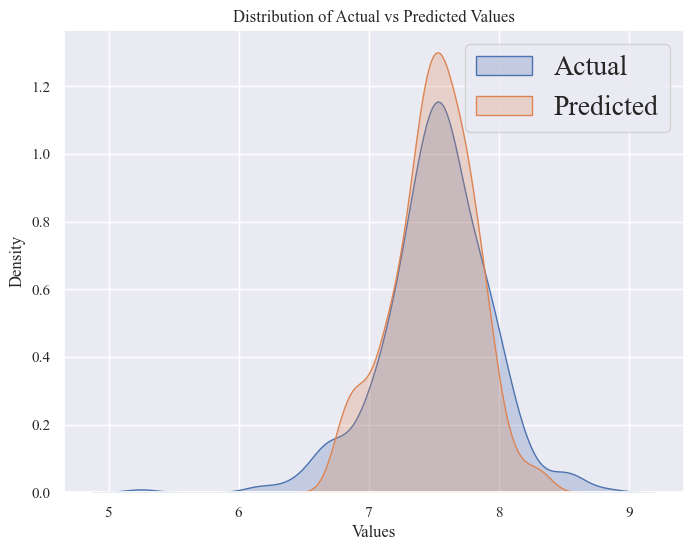

In [26]:
#Distribution plot
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()

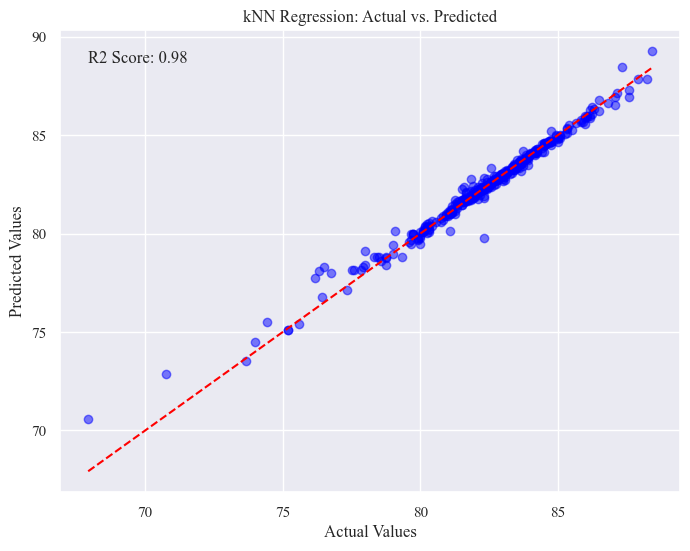

In [45]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train) 

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('kNN Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(y_test), max(y_pred), f'R2 Score: {r2:.2f}', fontsize=12, verticalalignment='top')
plt.grid(True)
plt.show()

## 📜Discussion of Results

## `Overall`
Having an R-squared (R²) value of 0.75 indicates that approximately 75% of the variance in the target variable is explained by the model, suggesting a strong relationship between the features and the target. The Mean Squared Error (MSE) of 0.04 signifies that, on average, the model's predictions are close to the actual values, while the Root Mean Squared Error (RMSE) of 0.20 indicates that the average magnitude of errors in the predicted values is relatively small. Collectively, these metrics suggest that the model provides a good fit to the data, with accurate predictions and a high proportion of variance explained, demonstrating its effectiveness in capturing the underlying patterns in the data.

## Top Features

In [27]:
print('Features with their corresponding correlation values to the target variable:\n\nFeature\t            Correlation')
print('-'*32)
print(cupping_scores.corr().Overall[cupping_scores.corr()[cupping_scores.columns[-1]].abs().index.tolist()
                             [:-1]].sort_values(ascending=False))

Features with their corresponding correlation values to the target variable:

Feature	            Correlation
--------------------------------
Total_Cup_Points    0.810948
Flavor              0.805343
Aftertaste          0.796156
Balance             0.752644
Acidity             0.713959
Aroma               0.706069
Body                0.681268
Uniformity          0.355113
Clean_Cup           0.353431
Sweetness           0.297338
Name: Overall, dtype: float64


In [42]:
cupping_score = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 
                     'Sweetness', 'Overall', 'Total_Cup_Points']]

X = cupping_score.drop('Total_Cup_Points', axis = 1)
y = cupping_score['Total_Cup_Points']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=1)

training_score = []
test_score = []

neighbors_settings = range(1, 41)

for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

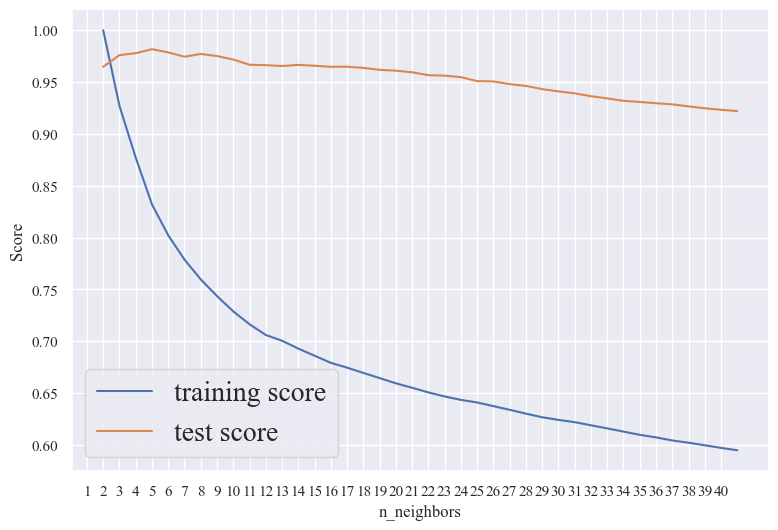

Best Score for kNN: 0.9817305890787968
Best parameter for n_neighbor: 4


In [43]:
plt.figure(figsize = (9,6))    
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.xticks(ticks=range(len(neighbors_settings)), labels=list(neighbors_settings))
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

print(f"Best Score for kNN: {np.max(test_score)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_score)+1}")

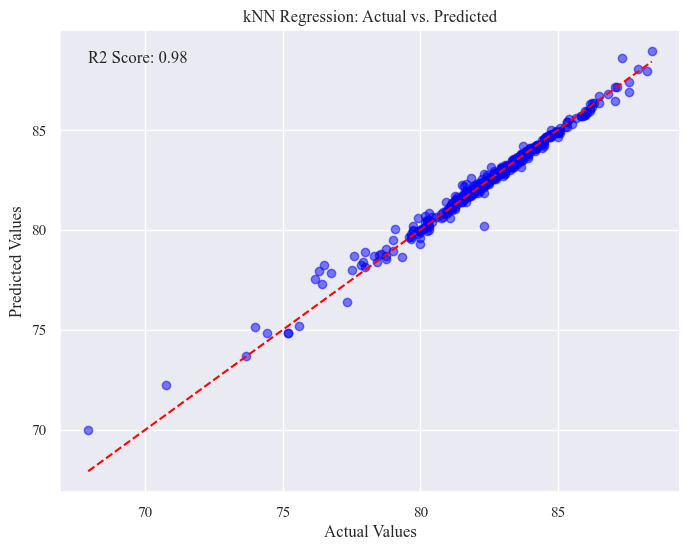

In [44]:
reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train, y_train) 

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('kNN Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(y_test), max(y_pred), f'R2 Score: {r2:.2f}', fontsize=12, verticalalignment='top')
plt.grid(True)
plt.show()